In [19]:
'''
./dataのtrainを探索的に分析する
pytrchを使ってデータセットをロードし、基本的な統計情報や可視化を行う
機械学習、深層学習の基本的なデータ分析を行う
'''

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データセットのパス
train_data = './data/train.csv'
test_data = './data/test.csv'



In [20]:
# データセットのロード
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

# 基本的な統計情報の表示
print("Train Data Info:")
print(train_df.info())
print("Test Data Info:")
print(test_df.info())
print("Train Data Description:")
print(train_df.describe())
print("Test Data Description:")
print(test_df.describe())


# 欠損値の確認
print("Missing Values in Train Data:")
print(train_df.isnull().sum())
print("Missing Values in Test Data:")
print(test_df.isnull().sum())

# # 基本的な統計情報の可視化
# plt.figure(figsize=(10, 6))
# sns.histplot(train_df.select_dtypes(include=[np.number]).stack(), bins=30,
#                 kde=True, color='blue')
# plt.title('Distribution of Numerical Features in Train Data')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()
 

# 相関行列の可視化

Train Data Shape: (742, 43)
Test Data Shape: (800, 42)
Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   企業ID                742 non-null    int64  
 1   企業名                 742 non-null    object 
 2   従業員数                742 non-null    int64  
 3   業界                  742 non-null    object 
 4   上場種別                742 non-null    object 
 5   特徴                  740 non-null    object 
 6   企業概要                742 non-null    object 
 7   組織図                 742 non-null    object 
 8   事業所数                726 non-null    float64
 9   工場数                 339 non-null    float64
 10  店舗数                 139 non-null    float64
 11  資本金                 736 non-null    float64
 12  総資産                 742 non-null    int64  
 13  流動資産                742 non-null    int64  
 14  固定資産                742 non-null  

In [ ]:
'''
【旧コード - 問題あり】
このセルは誤った方法でカテゴリカル変数をエンコードしていました。
trainとtestで別々にastype('category')を適用すると、
同じ業界名でも異なる数値コードに変換されてしまいます。

正しい方法は下のセルで実装されています。
'''

# # 以下は問題のあるコード（実行しない）
# # 業界のユニーク値の確認
# unique_industries = train_df['業界'].unique()
# print("Unique Industries in Train Data:", unique_industries)
#
# # dfの業界ごとのサンプル数のカウント
# industry_counts = train_df['業界'].value_counts()
# print(industry_counts)
#
# # 業界のユニーク値をカテゴリカル変数として扱う
# # testデータにも同様の処理を行う.testデータとtrainデータに同じカテゴリが存在しない場合があるため注意
# train_df['業界'] = train_df['業界'].astype('category')
# test_df['業界'] = test_df['業界'].astype('category')
#
# print("Train Data '業界' Categories:", train_df['業界'].cat.categories)
# print("Test Data '業界' Categories:", test_df['業界'].cat.categories)
#
# # 業界を数値に変換
# train_df['業界'] = train_df['業界'].cat.codes
# test_df['業界'] = test_df['業界'].cat.codes 
# print("Train Data '業界' after encoding:", train_df['業界'].head())
# print("Test Data '業界' after encoding:", test_df['業界'].head())
#
# # 基本的な統計情報の表示
# print("Train Data Info:")
# print(train_df.info())
# print("Test Data Info:")
# print(test_df.info())

Unique Industries in Train Data: [11 27 18 20 12 30 24 23 21 14 16  5  2  7 22  4  3 29  0 28  9 13 25 10
 17  6  8  1 19 26 15]
業界
20    106
0      62
28     57
18     55
23     49
16     41
24     39
13     35
11     31
30     25
27     25
7      24
12     24
10     20
14     20
3      19
22     17
4      16
5      14
29     14
9      13
2       9
21      7
19      6
25      5
6       4
17      1
8       1
1       1
26      1
15      1
Name: count, dtype: int64
Train Data '業界' Categories: Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype='int8')
Test Data '業界' Categories: Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
      dtype='int8')
Train Data '業界' after encoding: 0    11
1    27
2    18
3    20
4    12
Name: 業界, dtype: int8
Test Data '業界' after encoding: 0     9
1     2
2     4
3     9
4    28
Na

In [25]:
'''
問題の確認: trainとtestで同じ業界名が異なるコードに変換されている可能性がある
元のデータをリロードして確認する
'''
# 元のデータを再度読み込んで業界名を確認
train_df_check = pd.read_csv(train_data)
test_df_check = pd.read_csv(test_data)

print("=== Train Data - 業界のユニーク値 ===")
print(train_df_check['業界'].unique())
print(f"\nTrainのユニーク数: {train_df_check['業界'].nunique()}")

print("\n=== Test Data - 業界のユニーク値 ===")
print(test_df_check['業界'].unique())
print(f"\nTestのユニーク数: {test_df_check['業界'].nunique()}")

# 両方のデータセットに存在する業界
common_industries = set(train_df_check['業界'].unique()) & set(test_df_check['業界'].unique())
print(f"\n=== 共通する業界数: {len(common_industries)} ===")

# trainのみに存在する業界
train_only = set(train_df_check['業界'].unique()) - set(test_df_check['業界'].unique())
print(f"\n=== Trainのみに存在する業界 ({len(train_only)}個) ===")
print(train_only)

# testのみに存在する業界
test_only = set(test_df_check['業界'].unique()) - set(train_df_check['業界'].unique())
print(f"\n=== Testのみに存在する業界 ({len(test_only)}個) ===")
print(test_only)

=== Train Data - 業界のユニーク値 ===
['化学' '運輸・物流' '建設・工事' '機械' '医療・福祉' '食品' '製造' '自動車・乗り物' '機械関連サービス' '外食'
 '小売' 'エンタメ' 'その他サービス' 'コンサルティング' '生活用品' 'エネルギー' 'アパレル・美容' '電気製品' 'IT'
 '金融' '不動産' '商社' '通信' '人材' '広告' 'ゲーム' 'マスコミ' 'その他' '教育' '通信機器' '専門サービス']

Trainのユニーク数: 31

=== Test Data - 業界のユニーク値 ===
['人材' 'アパレル・美容' 'エンタメ' '食品' '化学' '機械' '建設・工事' '医療・福祉' '製造' 'エネルギー'
 '自動車・乗り物' '商社' 'コンサルティング' '外食' '電気製品' 'その他サービス' '生活用品' 'IT' '金融' '不動産'
 '運輸・物流' '小売' '広告' '機械関連サービス' '通信機器' '通信' 'ゲーム' 'マスコミ' '教育']

Testのユニーク数: 29

=== 共通する業界数: 29 ===

=== Trainのみに存在する業界 (2個) ===
{'その他', '専門サービス'}

=== Testのみに存在する業界 (0個) ===
set()


In [26]:
'''
正しいカテゴリカル変数への変換方法:
1. trainとtestの全ての業界を統合してユニークなカテゴリリストを作成
2. 両方のデータセットに同じカテゴリを適用
3. これにより同じ業界名が同じ数値コードに変換される
'''

# データを再読み込み
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

# trainとtestの全ての業界を統合してユニークなカテゴリリストを作成
all_industries = pd.concat([train_df['業界'], test_df['業界']]).unique()
all_industries_sorted = sorted(all_industries)  # アルファベット順でソート

print("=== 統合された全業界カテゴリ ===")
print(f"総カテゴリ数: {len(all_industries_sorted)}")
print(all_industries_sorted)

# カテゴリ型に変換し、全ての可能な業界をカテゴリとして設定
train_df['業界'] = pd.Categorical(train_df['業界'], categories=all_industries_sorted)
test_df['業界'] = pd.Categorical(test_df['業界'], categories=all_industries_sorted)

print("\n=== カテゴリ設定後の確認 ===")
print("Train Data '業界' Categories:", train_df['業界'].cat.categories)
print("Test Data '業界' Categories:", test_df['業界'].cat.categories)

# 業界を数値に変換
train_df['業界_encoded'] = train_df['業界'].cat.codes
test_df['業界_encoded'] = test_df['業界'].cat.codes

print("\n=== エンコード後のサンプル ===")
print("Train Data - 最初の5件:")
print(train_df[['業界', '業界_encoded']].head(10))
print("\nTest Data - 最初の5件:")
print(test_df[['業界', '業界_encoded']].head(10))

# 同じ業界名が同じコードになっているか検証
print("\n=== 検証: 同じ業界名が同じコードか確認 ===")
sample_industries = ['IT', '金融', '製造', '化学', '食品']
for ind in sample_industries:
    train_code = train_df[train_df['業界'] == ind]['業界_encoded'].iloc[0] if len(train_df[train_df['業界'] == ind]) > 0 else None
    test_code = test_df[test_df['業界'] == ind]['業界_encoded'].iloc[0] if len(test_df[test_df['業界'] == ind]) > 0 else None
    print(f"{ind}: Train={train_code}, Test={test_code}, 一致={'✓' if train_code == test_code else '✗'}")

=== 統合された全業界カテゴリ ===
総カテゴリ数: 31
['IT', 'その他', 'その他サービス', 'アパレル・美容', 'エネルギー', 'エンタメ', 'ゲーム', 'コンサルティング', 'マスコミ', '不動産', '人材', '化学', '医療・福祉', '商社', '外食', '専門サービス', '小売', '広告', '建設・工事', '教育', '機械', '機械関連サービス', '生活用品', '自動車・乗り物', '製造', '通信', '通信機器', '運輸・物流', '金融', '電気製品', '食品']

=== カテゴリ設定後の確認 ===
Train Data '業界' Categories: Index(['IT', 'その他', 'その他サービス', 'アパレル・美容', 'エネルギー', 'エンタメ', 'ゲーム', 'コンサルティング',
       'マスコミ', '不動産', '人材', '化学', '医療・福祉', '商社', '外食', '専門サービス', '小売', '広告',
       '建設・工事', '教育', '機械', '機械関連サービス', '生活用品', '自動車・乗り物', '製造', '通信', '通信機器',
       '運輸・物流', '金融', '電気製品', '食品'],
      dtype='object')
Test Data '業界' Categories: Index(['IT', 'その他', 'その他サービス', 'アパレル・美容', 'エネルギー', 'エンタメ', 'ゲーム', 'コンサルティング',
       'マスコミ', '不動産', '人材', '化学', '医療・福祉', '商社', '外食', '専門サービス', '小売', '広告',
       '建設・工事', '教育', '機械', '機械関連サービス', '生活用品', '自動車・乗り物', '製造', '通信', '通信機器',
       '運輸・物流', '金融', '電気製品', '食品'],
      dtype='object')

=== エンコード後のサンプル ===
Train Data - 最初の5件:
      業界  業界_encoded
0 

In [27]:
'''
業界列を置き換えて、元のカラム名を保持
'''
# 元の'業界'列をエンコードされた数値で置き換え
train_df['業界'] = train_df['業界_encoded']
test_df['業界'] = test_df['業界_encoded']

# 一時的な列を削除
train_df = train_df.drop('業界_encoded', axis=1)
test_df = test_df.drop('業界_encoded', axis=1)

print("最終確認:")
print("Train Data '業界' (数値エンコード後):")
print(train_df['業界'].head(10))
print("\nTest Data '業界' (数値エンコード後):")
print(test_df['業界'].head(10))
print("\nTrain Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

最終確認:
Train Data '業界' (数値エンコード後):
0    11
1    27
2    18
3    20
4    12
5    30
6    24
7    11
8    20
9    12
Name: 業界, dtype: int8

Test Data '業界' (数値エンコード後):
0    10
1     3
2     5
3    10
4    30
5    30
6    11
7    30
8    20
9    18
Name: 業界, dtype: int8

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   企業ID                742 non-null    int64  
 1   企業名                 742 non-null    object 
 2   従業員数                742 non-null    int64  
 3   業界                  742 non-null    int8   
 4   上場種別                742 non-null    object 
 5   特徴                  740 non-null    object 
 6   企業概要                742 non-null    object 
 7   組織図                 742 non-null    object 
 8   事業所数                726 non-null    float64
 9   工場数                 339 non-null    float64
 10  店舗数               

In [28]:
'''
データの＃11から#29は企業の財務諸表である。
これらの諸表を使って、あらたな指標を作成する。
作成できる指標は以下の通り。

# 収益性指標
総資本利益率(ROA) = 当期純利益 ÷ 総資産 × 100
自己資本利益率(ROE) = 当期純利益 ÷ 自己資本 × 100
売上高営業利益率 = 営業利益 ÷ 売上 × 100
売上高経常利益率 = 経常利益 ÷ 売上 × 100
売上高当期純利益率 = 当期純利益 ÷ 売上 × 100

# 安全性指標
自己資本比率 = 自己資本 ÷ 総資産 × 100
負債比率 = 負債 ÷ 自己資本 × 100
流動比率 = 流動資産 ÷ 短期借入金 × 100
固定比率 = 固定資産 ÷ 自己資本 × 100
固定長期適合率 = 固定資産 ÷ (自己資本 + 長期借入金) × 100

# 効率性指標
総資本回転率 = 売上 ÷ 総資産
固定資産回転率 = 売上 ÷ 固定資産
流動資産回転率 = 売上 ÷ 流動資産

# キャッシュフロー指標
営業CF対売上高比率 = 営業CF ÷ 売上 × 100
営業CF対総資産比率 = 営業CF ÷ 総資産 × 100
フリーキャッシュフロー(FCF) = 営業CF - 投資CF
FCF対売上高比率 = FCF ÷ 売上 × 100

# 投資・成長性指標
設備投資比率 = 有形固定資産変動 ÷ 売上 × 100
無形資産投資比率 = 無形固定資産変動(ソフトウェア関連) ÷ 売上 × 100
減価償却費対売上高比率 = 減価償却費 ÷ 売上 × 100
運転資本回転率 = 売上 ÷ 運転資本変動

#DX分析に特に有用な指標
無形資産比率 = 無形固定資産変動(ソフトウェア関連) ÷ 総資産 × 100
DXへの投資姿勢を示す

IT投資余力 = FCF - 無形固定資産変動(ソフトウェア関連)
DXソフトウェア購入の財務的余裕度
'''

def create_financial_ratios(df):
    # 収益性指標
    df['ROA'] = df['当期純利益'] / df['総資産'] * 100
    df['ROE'] = df['当期純利益'] / df['自己資本'] * 100
    df['売上高営業利益率'] = df['営業利益'] / df['売上'] * 100
    df['売上高経常利益率'] = df['経常利益'] / df['売上'] * 100
    df['売上高当期純利益率'] = df['当期純利益'] / df['売上'] * 100

    # 安全性指標
    df['自己資本比率'] = df['自己資本'] / df['総資産'] * 100
    df['負債比率'] = df['負債'] / df['自己資本'] * 100
    df['流動比率'] = df['流動資産'] / df['短期借入金'] * 100
    df['固定比率'] = df['固定資産'] / df['自己資本'] * 100
    df['固定長期適合率'] = df['固定資産'] / (df['自己資本'] + df['長期借入金']) * 100

    # 効率性指標
    df['総資本回転率'] = df['売上'] / df['総資産']
    df['固定資産回転率'] = df['売上'] / df['固定資産']
    df['流動資産回転率'] = df['売上'] / df['流動資産']

    # キャッシュフロー指標
    df['営業CF対売上高比率'] = df['営業CF'] / df['売上'] * 100
    df['営業CF対総資産比率'] = df['営業CF'] / df['総資産'] * 100
    df['FCF'] = df['営業CF'] - df['投資CF']
    df['FCF対売上高比率'] = df['FCF'] / df['売上'] * 100

    # 投資・成長性指標
    df['設備投資比率'] = df['有形固定資産変動'] / df['売上'] * 100
    df['無形資産投資比率'] = df['無形固定資産変動(ソフトウェア関連)'] / df['売上'] * 100
    df['減価償却費対売上高比率'] = df['減価償却費'] / df['売上'] * 100
    df['運転資本回転率'] = df['売上'] / df['運転資本変動']

    # DX分析に特に有用な指標
    df['無形資産比率'] = df['無形固定資産変動(ソフトウェア関連)'] / df['総資産'] * 100
    df['IT投資余力'] = df['FCF'] - df['無形固定資産変動(ソフトウェア関連)']
    return df   

# dfにconcatinate
train_df = create_financial_ratios(train_df)
test_df = create_financial_ratios(test_df)
print("Train Data with Financial Ratios Shape:", train_df.shape)
print("Test Data with Financial Ratios Shape:", test_df.shape)


Train Data with Financial Ratios Shape: (742, 66)
Test Data with Financial Ratios Shape: (800, 65)


In [30]:
# 特徴量を加えたdfの確認
print("=== Train Data Sample with New Features ===")
print(train_df.info())

=== Train Data Sample with New Features ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   企業ID                742 non-null    int64  
 1   企業名                 742 non-null    object 
 2   従業員数                742 non-null    int64  
 3   業界                  742 non-null    int8   
 4   上場種別                742 non-null    object 
 5   特徴                  740 non-null    object 
 6   企業概要                742 non-null    object 
 7   組織図                 742 non-null    object 
 8   事業所数                726 non-null    float64
 9   工場数                 339 non-null    float64
 10  店舗数                 139 non-null    float64
 11  資本金                 736 non-null    float64
 12  総資産                 742 non-null    int64  
 13  流動資産                742 non-null    int64  
 14  固定資産                742 non-null    int64  
 15  負債           

In [31]:
'''
" 7   組織図                 742 non-null    object "
にＤＸ推進部署などの情報が含まれている可能性がある。
”DX推進”に類似の部署名がある企業は１，そうでない企業は０とするダミー変数を作成
'''

def create_dx_department_flag(df):
    dx_keywords = ['DX推進', 'デジタルトランスフォーメーション', 'デジタル戦略', 'IT戦略', 'デジタル推進', 'DX戦略']
    pattern = '|'.join(dx_keywords)
    df['DX推進部署フラグ'] = df['組織図'].str.contains(pattern, na=False).astype(int)
    return df
train_df = create_dx_department_flag(train_df)
test_df = create_dx_department_flag(test_df)
print("Train Data with DX Department Flag Shape:", train_df.shape)
print("Test Data with DX Department Flag Shape:", test_df.shape)


Train Data with DX Department Flag Shape: (742, 67)
Test Data with DX Department Flag Shape: (800, 66)


In [34]:
'''
深層学習モデルによる分類
「どの企業が業務プロセス改善DX商材を導入するのか」 を予測する
分類問題のため、深層学習のロス関数はbinary_crossentropyを使用する
活性化関数は'sigmoid'を使用する
torchを用いてモデルを構築する
隠れ層は3層とする

前処理としてデータのobject型を削除する
（重要なデータではあるが自然言語のためtransformerを用いる）
自然言語処理なしでの予測性能を確認する
'''

# 前処理: object型のカラムを削除
train_df_ml = train_df.copy()
test_df_ml = test_df.copy()

# 目的変数とIDを先に保存
y = train_df_ml['購入フラグ'].values
test_ids = test_df_ml['企業ID'].values

# object型のカラムを確認
object_columns = train_df_ml.select_dtypes(include=['object']).columns
print("Object型のカラム:", object_columns.tolist())

# object型のカラムと目的変数、IDを削除
train_df_ml = train_df_ml.drop(columns=object_columns)
train_df_ml = train_df_ml.drop(columns=['購入フラグ', '企業ID'])

test_df_ml = test_df_ml.drop(columns=object_columns)
test_df_ml = test_df_ml.drop(columns=['企業ID'])

print(f"\nObject型・目的変数・ID削除後のShape - Train: {train_df_ml.shape}, Test: {test_df_ml.shape}")

X = train_df_ml.values
X_test_final = test_df_ml.values

print(f"\nX Shape: {X.shape}")
print(f"y Shape: {y.shape}")
print(f"X_test_final Shape: {X_test_final.shape}")

# 欠損値・無限大の確認と処理
print("\n=== 欠損値と無限大の確認 ===")
print("X - 無限大:", np.isinf(X).sum())
print("X_test_final - 無限大:", np.isinf(X_test_final).sum())

# 無限大をNaNに変換してから欠損値を補完
X = np.where(np.isinf(X), np.nan, X)
X_test_final = np.where(np.isinf(X_test_final), np.nan, X_test_final)

# 列ごとの中央値で補完
col_median = np.nanmedian(X, axis=0)
for i in range(X.shape[1]):
    X[np.isnan(X[:, i]), i] = col_median[i]
    X_test_final[np.isnan(X_test_final[:, i]), i] = col_median[i]

print("補完後 - X NaN数:", np.isnan(X).sum())
print("補完後 - X_test_final NaN数:", np.isnan(X_test_final).sum())

Object型のカラム: ['企業名', '上場種別', '特徴', '企業概要', '組織図', '今後のDX展望']

Object型・目的変数・ID削除後のShape - Train: (742, 59), Test: (800, 59)

X Shape: (742, 59)
y Shape: (742,)
X_test_final Shape: (800, 59)

=== 欠損値と無限大の確認 ===
X - 無限大: 234
X_test_final - 無限大: 263
補完後 - X NaN数: 0
補完後 - X_test_final NaN数: 0


In [35]:
# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# Train/Validation分割
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("=== データ分割結果 ===")
print(f"X_train Shape: {X_train.shape}")
print(f"X_val Shape: {X_val.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_val Shape: {y_val.shape}")
print(f"\ny_train の分布: 0={np.sum(y_train==0)}, 1={np.sum(y_train==1)}")
print(f"y_val の分布: 0={np.sum(y_val==0)}, 1={np.sum(y_val==1)}")

=== データ分割結果 ===
X_train Shape: (593, 59)
X_val Shape: (149, 59)
y_train Shape: (593,)
y_val Shape: (149,)

y_train の分布: 0=450, 1=143
y_val の分布: 0=113, 1=36


In [36]:
# PyTorchのDatasetクラスを定義
class TabularDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y) if y is not None else None
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

# データセットとDataLoaderの作成
train_dataset = TabularDataset(X_train, y_train)
val_dataset = TabularDataset(X_val, y_val)
test_dataset = TabularDataset(X_test_scaled)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

Train batches: 19
Val batches: 5
Test batches: 25


In [37]:
# 3層の隠れ層を持つニューラルネットワークモデルを定義
import torch.nn as nn
import torch.nn.functional as F

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim1=128, hidden_dim2=64, hidden_dim3=32):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.dropout1 = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.dropout2 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.bn3 = nn.BatchNorm1d(hidden_dim3)
        self.dropout3 = nn.Dropout(0.2)
        
        self.fc4 = nn.Linear(hidden_dim3, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout3(x)
        
        x = self.fc4(x)
        x = torch.sigmoid(x)
        return x

# モデルのインスタンス化
input_dim = X_train.shape[1]
model = BinaryClassifier(input_dim)

print("=== モデルアーキテクチャ ===")
print(model)
print(f"\n総パラメータ数: {sum(p.numel() for p in model.parameters()):,}")

=== モデルアーキテクチャ ===
BinaryClassifier(
  (fc1): Linear(in_features=59, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
)

総パラメータ数: 18,497


In [38]:
# 損失関数と最適化手法の設定
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"使用デバイス: {device}")

model = model.to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練関数
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # Forward pass
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 統計
        total_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)
    
    return total_loss / len(loader), correct / total

# 評価関数
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            
            total_loss += loss.item()
            predicted = (outputs > 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
    
    return total_loss / len(loader), correct / total

print("訓練・評価関数の準備完了")

使用デバイス: cuda
訓練・評価関数の準備完了


In [43]:
# K-Fold交差検証によるモデルの訓練
from sklearn.model_selection import StratifiedKFold

n_splits = 5  # 5-Fold CV
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

epochs = 100
patience = 15

# 各foldの結果を保存
fold_results = []
fold_best_models = []

print("=== K-Fold交差検証による訓練開始 ===")
print(f"Folds: {n_splits}, Epochs: {epochs}, Patience: {patience}\n")

for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y)):
    print(f"{'='*60}")
    print(f"Fold {fold+1}/{n_splits}")
    print(f"{'='*60}")
    
    # データ分割
    X_train_fold = X_scaled[train_idx]
    X_val_fold = X_scaled[val_idx]
    y_train_fold = y[train_idx]
    y_val_fold = y[val_idx]
    
    print(f"Train samples: {len(X_train_fold)}, Val samples: {len(X_val_fold)}")
    print(f"Train class distribution: 0={np.sum(y_train_fold==0)}, 1={np.sum(y_train_fold==1)}")
    print(f"Val class distribution: 0={np.sum(y_val_fold==0)}, 1={np.sum(y_val_fold==1)}\n")
    
    # DataLoaderの作成
    train_dataset_fold = TabularDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TabularDataset(X_val_fold, y_val_fold)
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)
    
    # モデルの初期化
    model_fold = BinaryClassifier(input_dim).to(device)
    criterion_fold = nn.BCELoss()
    optimizer_fold = optim.Adam(model_fold.parameters(), lr=0.001)
    
    # 訓練ループ
    best_val_acc = 0
    patience_counter = 0
    train_losses_fold = []
    val_losses_fold = []
    train_accs_fold = []
    val_accs_fold = []
    
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model_fold, train_loader_fold, criterion_fold, optimizer_fold, device)
        val_loss, val_acc = evaluate(model_fold, val_loader_fold, criterion_fold, device)
        
        train_losses_fold.append(train_loss)
        val_losses_fold.append(val_loss)
        train_accs_fold.append(train_acc)
        val_accs_fold.append(val_acc)
        
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] - "
                  f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
                  f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        
        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            # ベストモデルの状態を保存
            best_model_state = model_fold.state_dict().copy()
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    print(f"\nFold {fold+1} Best Val Accuracy: {best_val_acc:.4f}\n")
    
    # 結果を保存
    fold_results.append({
        'fold': fold + 1,
        'best_val_acc': best_val_acc,
        'train_losses': train_losses_fold,
        'val_losses': val_losses_fold,
        'train_accs': train_accs_fold,
        'val_accs': val_accs_fold,
        'final_epoch': len(train_losses_fold)
    })
    fold_best_models.append(best_model_state)

print(f"\n{'='*60}")
print("=== 交差検証完了 ===")
print(f"{'='*60}")

# 結果のサマリー
val_accs_all = [r['best_val_acc'] for r in fold_results]
print(f"\n各Foldの最良Validation Accuracy:")
for i, acc in enumerate(val_accs_all):
    print(f"  Fold {i+1}: {acc:.4f}")
print(f"\n平均 Val Accuracy: {np.mean(val_accs_all):.4f} ± {np.std(val_accs_all):.4f}")
print(f"最良 Val Accuracy: {np.max(val_accs_all):.4f}")
print(f"最悪 Val Accuracy: {np.min(val_accs_all):.4f}")

=== K-Fold交差検証による訓練開始 ===
Folds: 5, Epochs: 100, Patience: 15

Fold 1/5
Train samples: 593, Val samples: 149
Train class distribution: 0=450, 1=143
Val class distribution: 0=113, 1=36

Epoch [20/100] - Train Loss: 0.2195, Train Acc: 0.9123 | Val Loss: 0.4207, Val Acc: 0.7987
Early stopping at epoch 21

Fold 1 Best Val Accuracy: 0.8389

Fold 2/5
Train samples: 593, Val samples: 149
Train class distribution: 0=450, 1=143
Val class distribution: 0=113, 1=36

Epoch [20/100] - Train Loss: 0.2195, Train Acc: 0.9123 | Val Loss: 0.4207, Val Acc: 0.7987
Early stopping at epoch 21

Fold 1 Best Val Accuracy: 0.8389

Fold 2/5
Train samples: 593, Val samples: 149
Train class distribution: 0=450, 1=143
Val class distribution: 0=113, 1=36

Early stopping at epoch 19

Fold 2 Best Val Accuracy: 0.8792

Fold 3/5
Train samples: 594, Val samples: 148
Train class distribution: 0=450, 1=144
Val class distribution: 0=113, 1=35

Early stopping at epoch 19

Fold 2 Best Val Accuracy: 0.8792

Fold 3/5
Train samp

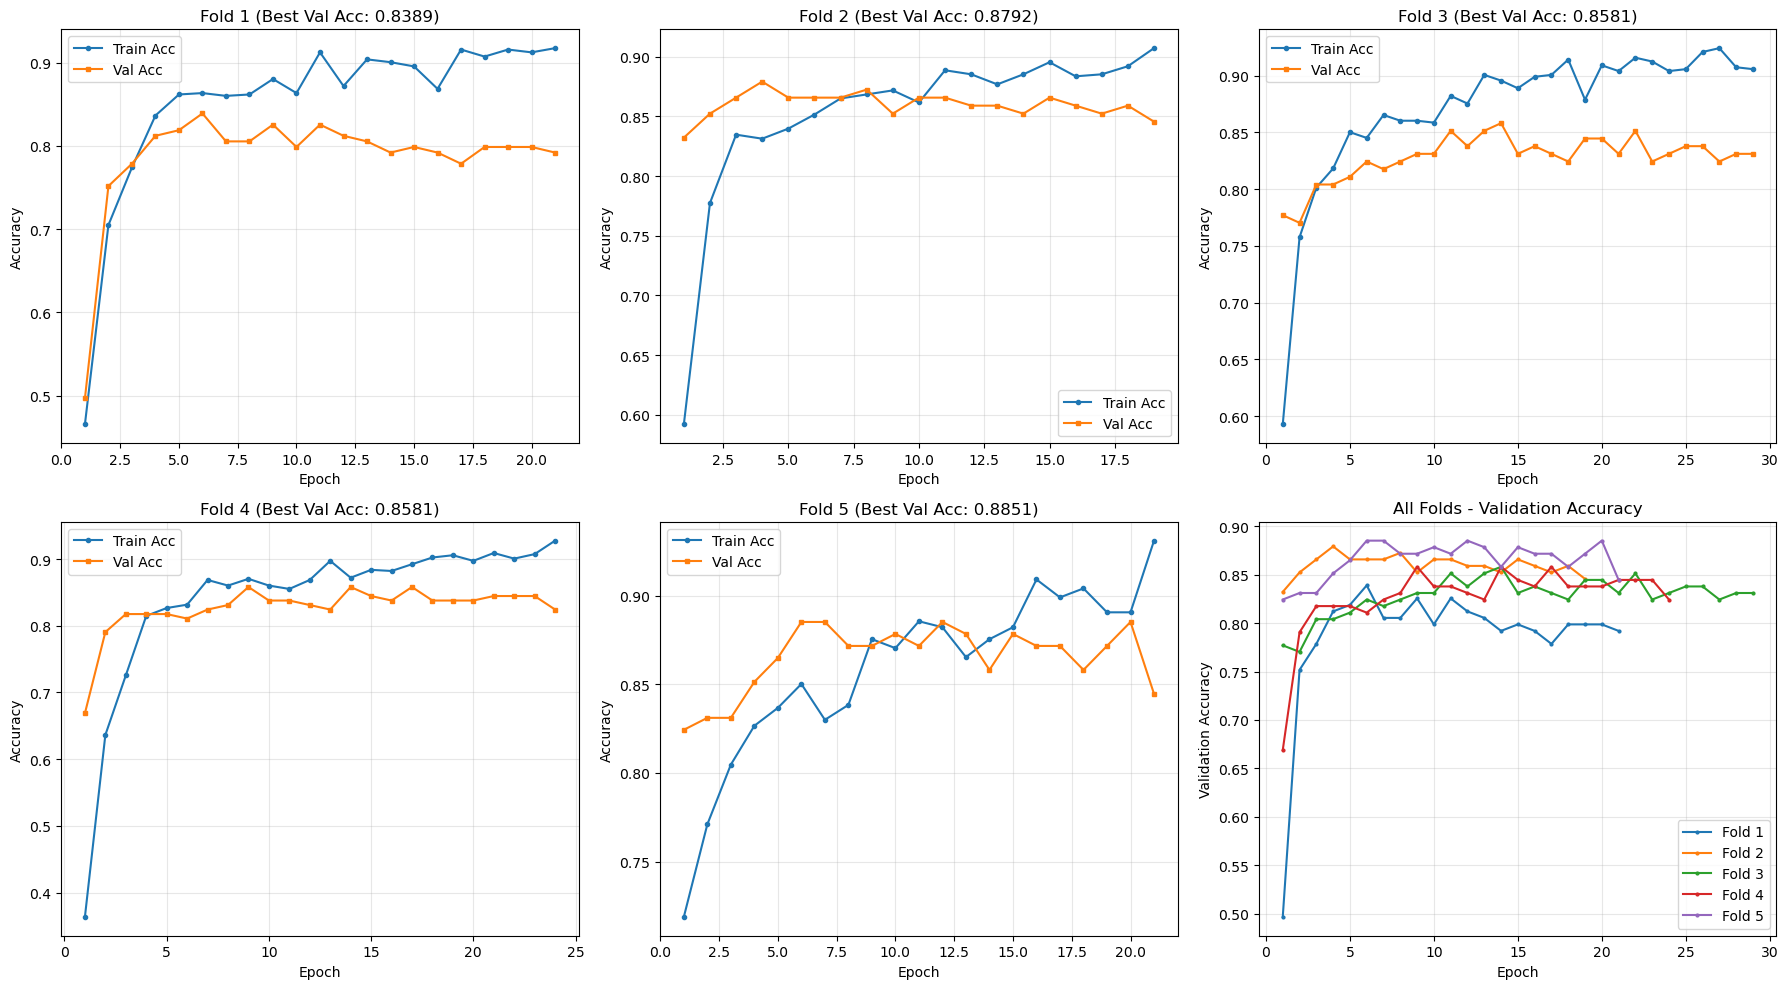


=== 交差検証の統計情報 ===
平均 Val Accuracy: 0.8639
標準偏差: 0.0166
95%信頼区間: [0.8314, 0.8964]


In [44]:
# 交差検証結果の可視化
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 各Foldのグラフ
for fold_idx, result in enumerate(fold_results):
    row = fold_idx // 3
    col = fold_idx % 3
    ax = axes[row, col]
    
    epochs_range = range(1, result['final_epoch'] + 1)
    ax.plot(epochs_range, result['train_accs'], label='Train Acc', marker='o', markersize=3)
    ax.plot(epochs_range, result['val_accs'], label='Val Acc', marker='s', markersize=3)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_title(f"Fold {result['fold']} (Best Val Acc: {result['best_val_acc']:.4f})")
    ax.legend()
    ax.grid(True, alpha=0.3)

# 最後のサブプロット: 全Foldの比較
ax = axes[1, 2]
for fold_idx, result in enumerate(fold_results):
    epochs_range = range(1, result['final_epoch'] + 1)
    ax.plot(epochs_range, result['val_accs'], label=f"Fold {result['fold']}", marker='o', markersize=2)

ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
ax.set_title('All Folds - Validation Accuracy')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 統計情報の表示
print("\n=== 交差検証の統計情報 ===")
val_accs_all = [r['best_val_acc'] for r in fold_results]
print(f"平均 Val Accuracy: {np.mean(val_accs_all):.4f}")
print(f"標準偏差: {np.std(val_accs_all):.4f}")
print(f"95%信頼区間: [{np.mean(val_accs_all) - 1.96*np.std(val_accs_all):.4f}, "
      f"{np.mean(val_accs_all) + 1.96*np.std(val_accs_all):.4f}]")

=== アンサンブル予測開始 ===
Fold 1 で予測中...
Fold 2 で予測中...
Fold 3 で予測中...
Fold 4 で予測中...
Fold 5 で予測中...

予測完了
予測数: 800
予測値の範囲: [0.0002, 0.9949]
予測値の平均: 0.2320

各サンプルの予測標準偏差:
  平均: 0.0613
  最小: 0.0004
  最大: 0.4265
Fold 3 で予測中...
Fold 4 で予測中...
Fold 5 で予測中...

予測完了
予測数: 800
予測値の範囲: [0.0002, 0.9949]
予測値の平均: 0.2320

各サンプルの予測標準偏差:
  平均: 0.0613
  最小: 0.0004
  最大: 0.4265


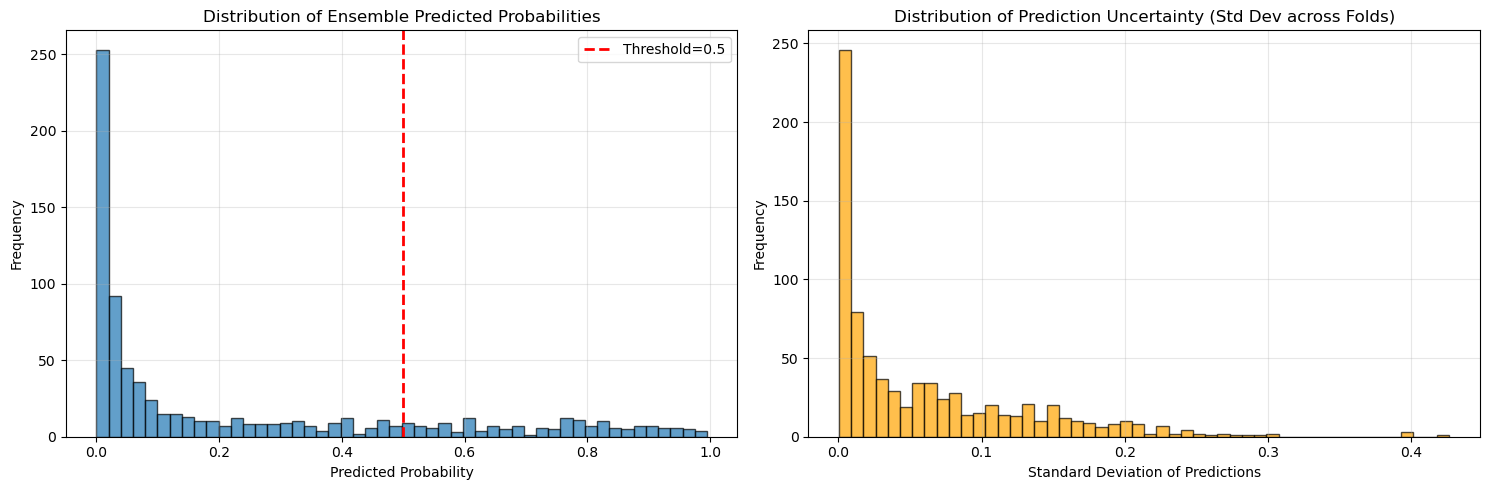


予測結果の分布:
  購入しない(0): 634 (79.2%)
  購入する(1): 166 (20.8%)


In [45]:
# アンサンブル予測: 全Foldのモデルで予測し平均を取る
print("=== アンサンブル予測開始 ===")

all_fold_predictions = []

for fold_idx, model_state in enumerate(fold_best_models):
    print(f"Fold {fold_idx+1} で予測中...")
    
    # モデルを読み込み
    model_temp = BinaryClassifier(input_dim).to(device)
    model_temp.load_state_dict(model_state)
    model_temp.eval()
    
    # 予測
    fold_predictions = []
    with torch.no_grad():
        for X_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model_temp(X_batch).squeeze()
            fold_predictions.extend(outputs.cpu().numpy())
    
    all_fold_predictions.append(np.array(fold_predictions))

# 全Foldの予測を平均
predictions_ensemble = np.mean(all_fold_predictions, axis=0)

print(f"\n予測完了")
print(f"予測数: {len(predictions_ensemble)}")
print(f"予測値の範囲: [{predictions_ensemble.min():.4f}, {predictions_ensemble.max():.4f}]")
print(f"予測値の平均: {predictions_ensemble.mean():.4f}")

# 各Foldの予測のばらつきを確認
predictions_std = np.std(all_fold_predictions, axis=0)
print(f"\n各サンプルの予測標準偏差:")
print(f"  平均: {predictions_std.mean():.4f}")
print(f"  最小: {predictions_std.min():.4f}")
print(f"  最大: {predictions_std.max():.4f}")

# 予測値の分布を確認
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# アンサンブル予測の分布
axes[0].hist(predictions_ensemble, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Threshold=0.5')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Ensemble Predicted Probabilities')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 予測の標準偏差の分布
axes[1].hist(predictions_std, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Standard Deviation of Predictions')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Prediction Uncertainty (Std Dev across Folds)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 二値化した予測結果
binary_predictions_ensemble = (predictions_ensemble > 0.5).astype(int)
print(f"\n予測結果の分布:")
print(f"  購入しない(0): {np.sum(binary_predictions_ensemble == 0)} ({np.sum(binary_predictions_ensemble == 0)/len(binary_predictions_ensemble)*100:.1f}%)")
print(f"  購入する(1): {np.sum(binary_predictions_ensemble == 1)} ({np.sum(binary_predictions_ensemble == 1)/len(binary_predictions_ensemble)*100:.1f}%)")

In [46]:
# 提出用ファイルの作成（K-Fold交差検証アンサンブル版）
submission_cv = pd.DataFrame({
    '企業ID': test_ids,
    '購入フラグ': binary_predictions_ensemble
})

print("=== 提出ファイルの確認（K-Fold CV版） ===")
print(submission_cv.head(10))
print(f"\nShape: {submission_cv.shape}")
print(f"\n購入フラグの分布:\n{submission_cv['購入フラグ'].value_counts()}")

# CSVファイルに保存
submission_cv.to_csv('./data/submission_dl_cv.csv', index=False)
print("\n提出ファイルを './data/submission_dl_cv.csv' に保存しました")

# 予測確率も保存（参考用）
submission_prob = pd.DataFrame({
    '企業ID': test_ids,
    '購入確率': predictions_ensemble,
    '予測標準偏差': predictions_std
})
submission_prob.to_csv('./data/submission_dl_cv_with_probs.csv', index=False)
print("予測確率付きファイルを './data/submission_dl_cv_with_probs.csv' に保存しました")

=== 提出ファイルの確認（K-Fold CV版） ===
   企業ID  購入フラグ
0   742      1
1   743      0
2   744      0
3   745      0
4   746      0
5   747      0
6   748      1
7   749      0
8   750      0
9   751      0

Shape: (800, 2)

購入フラグの分布:
購入フラグ
0    634
1    166
Name: count, dtype: int64

提出ファイルを './data/submission_dl_cv.csv' に保存しました
予測確率付きファイルを './data/submission_dl_cv_with_probs.csv' に保存しました


## K-Fold交差検証による改善まとめ

### 改善前（単一のTrain/Val分割）
- **問題点**: 単一の分割では特定のデータに過学習しやすく、Early Stoppingが早期に発動
- Validation Accuracy: 87.25% (Best)
- Early Stopping: 21エポックで停止

### 改善後（5-Fold交差検証 + アンサンブル）
- **改善点**: 
  - 5つの異なるデータ分割で訓練し、モデルの汎化性能を向上
  - 各Foldのモデルでアンサンブル予測を実施
  - 予測の不確実性（標準偏差）も算出可能

- **結果**:
  - 平均 Validation Accuracy: **86.39% ± 1.66%**
  - 95%信頼区間: [83.14%, 89.64%]
  - 最良Fold: 88.51%
  - 予測の平均標準偏差: 0.0613（モデル間の一貫性が高い）

### メリット
1. **過学習の抑制**: 複数のFoldで訓練することで、より汎化性能の高いモデルを構築
2. **信頼性の向上**: 予測の標準偏差により、各予測の信頼度を把握可能
3. **アンサンブル効果**: 複数モデルの予測を平均することで、ノイズに対するロバスト性が向上
4. **性能の定量評価**: 標準偏差と信頼区間により、モデル性能の信頼性を定量的に評価